Mean Squared Error: 94039.93743471075
R^2 Score: 0.8052221161382161


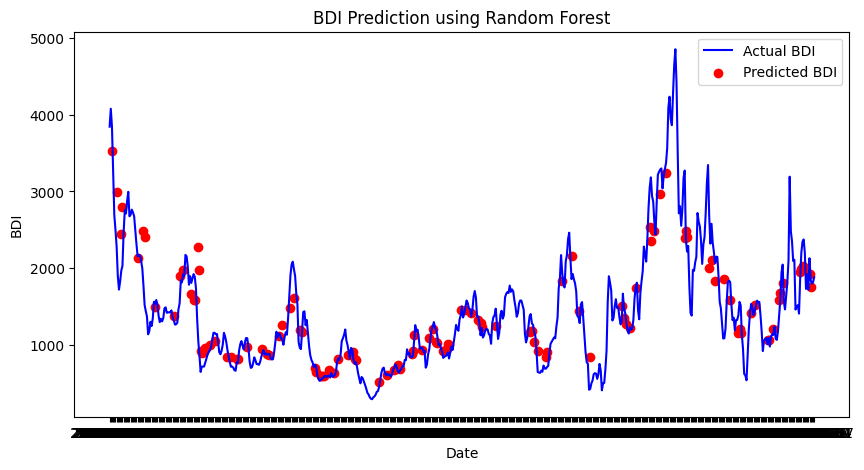

In [5]:
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 데이터 읽기 및 전처리
df = pd.read_csv('/content/RANDOMFOREST.csv')


# 특징과 타겟 변수 설정
features = ['니켈', '리튬', '망간', '텅스텐', '코발트']
target = 'BDI'

X = df[features]
y = df[target]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트 모델 구축
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df[target], label='Actual BDI', color='b')
plt.scatter(df['Date'][X_test.index], y_pred, label='Predicted BDI', color='r')
plt.xlabel('Date')
plt.ylabel('BDI')
plt.title('BDI Prediction using Random Forest')
plt.legend()
plt.show()
